In [2]:
import pandas as pd
import pickle
import numpy as np

In [9]:
# TODO: move to dataloader.py

def make_unique_ints(df, col):

    unique_ids = set(i[col]
                        for i in df.to_dict('records'))
    ids_to_ints = {j: i for i, j in enumerate(unique_ids)}
    new_col = [ids_to_ints[i] for i in df[col]]
    return new_col, ids_to_ints


def map_unique_ints(df, col, ids_to_ints):
    new_col = [ids_to_ints[i] for i in df[col]]
    return new_col




file_path = "movieLens/movies.dat"

movies_df = pd.read_csv(file_path, delimiter='::', header=None, names=['ID', 'Title', 'Genres'], encoding='latin1', index_col=[0])

file_path = "movieLens/users.dat"

users_df = pd.read_csv(file_path, delimiter='::', header=None, names=['ID', 'Gender', "Age", "Occupation", "Zipcode"], encoding='latin1', index_col=[0])

movies_df = movies_df.reset_index()
movies_df = movies_df.drop('Title', axis=1)




id_maps = []
movies_df['ID'], movies_id_map = make_unique_ints(movies_df, 'ID')
id_maps.append(movies_id_map)






users_df = users_df.reset_index()
users_df = users_df.drop('Zipcode', axis=1)

for col in users_df.columns:
    users_df[col], users_id_map = make_unique_ints(users_df, col)
    id_maps.append(users_id_map)
    




file_path = "movieLens/ratings.dat"

ratings_df = pd.read_csv(file_path, delimiter='::', header=None, names=["UserID", "MovieID", "Rating", "Timestamp"], encoding='latin1', index_col=[0])


ratings_df = ratings_df.reset_index()

ratings_df['UserID'] = map_unique_ints(ratings_df, 'UserID', id_maps[len(movies_df.columns)-1])
ratings_df['MovieID'] = map_unique_ints(ratings_df, 'MovieID', id_maps[0])
ratings_df = ratings_df[["MovieID", "UserID"]]





B = np.zeros((len(movies_df), len(users_df)))
B[ratings_df['MovieID'], ratings_df['UserID']] = 1



movies_df = movies_df.drop("ID", axis=1)
users_df = users_df.drop("ID", axis=1)



movie_Genres = [
"Action",
"Adventure",
"Animation",
"Children\'s",
"Comedy",
"Crime",
"Documentary",
"Drama",
"Fantasy",
"Film-Noir",
"Horror",
"Musical",
"Mystery",
"Romance",
"Sci-Fi",
"Thriller",
"War",
"Western"
]

for name in movie_Genres:
    movies_df["is_"+name] = movies_df['Genres'].str.contains(name) * 1
    assert sum(movies_df["is_"+name]) > 0

movies_df = movies_df.drop('Genres', axis=1)


C:\Users\ojasg\AppData\Local\Temp\ipykernel_33096\3616641571.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_df = pd.read_csv(file_path, delimiter='::', header=None, names=['ID', 'Title', 'Genres'], encoding='latin1', index_col=[0])
C:\Users\ojasg\AppData\Local\Temp\ipykernel_33096\3616641571.py:25: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users_df = pd.read_csv(file_path, delimiter='::', header=None, names=['ID', 'Gender', "Age", "Occupation", "Zipcode"], encoding='latin1', index_col=[0])
C:\Users\ojasg\AppData\Local\Temp\ipykernel_33096\3616641571.py:57: ParserWarning: Falling back to

Index(['ID', 'Gender', 'Age', 'Occupation'], dtype='object')


In [3]:
# TODO: move to utility.py
# TODO: Check if preprocessor_eps is needed

from snsynth import Synthesizer

def compute_single_table_synth_data(df, n1, synthesizer='patectgan', epsilon=3, preprocessor_eps=0.5):

    if synthesizer == 'patectgan':
        synth = Synthesizer.create("patectgan", epsilon=epsilon, verbose=True)
        synth.fit(df, preprocessor_eps=preprocessor_eps)
        dat = synth.sample(n1)
        return dat
    elif synthesizer == 'dpctgan':
        synth = Synthesizer.create("dpctgan", epsilon=epsilon, verbose=True)
        synth.fit(df, preprocessor_eps=preprocessor_eps)
        dat = synth.sample(n1)
        return dat
    elif synthesizer == 'mst':
        synth = Synthesizer.create("mst", epsilon=epsilon, verbose=True)
        synth.fit(df, preprocessor_eps=preprocessor_eps)
        dat = synth.sample(n1)
        return dat
    elif synthesizer == 'aim':
        synth = Synthesizer.create("aim", epsilon=epsilon, verbose=True)
        synth.fit(df, preprocessor_eps=preprocessor_eps)
        dat = synth.sample(n1)
        return dat
    else:
        return df


In [4]:
ratings_df.rename(columns={'MovieID': 'ID_1'}, inplace=True)
ratings_df.rename(columns={'UserID': 'ID_2'}, inplace=True)

In [5]:
df1 = movies_df
df2 = users_df 
relationship = ratings_df

df1_ordinal_cols = list(movies_df.columns)
df2_ordinal_cols = list(users_df.columns)

synth = 'mst'

epsilon = 3.0
T = 100

In [6]:
n1 = len(df1)
n2 = len(df2)
d1 = len(df1.columns)
d2 = len(df2.columns)



#### TODO: This is just for the testing purpose! Increase this number!!!!!
n_syn1 = 776
n_syn2 = 1208

# n_syn1 = n1
# n_syn2 = n2

df1_synt = compute_single_table_synth_data(df1, n_syn1, synth, epsilon = 1.0)
df2_synt = compute_single_table_synth_data(df2, n_syn2, synth, epsilon = 1.0)

c:\C\MIT\Spring24\UROP_P2\code\code\.venv\lib\site-packages\mbi\__init__.py:15: UserWarning: MixtureInference disabled, please install jax and jaxlib
  warnings.warn('MixtureInference disabled, please install jax and jaxlib')


Fitting with 262144 dimensions
Getting cliques
Estimating marginals
Fitting with 294 dimensions
Getting cliques
Estimating marginals


In [7]:
# TODO: remove np.sort() and check no bug
df1_col_dic = {col: {'unique_values': list(np.sort(df1[col].unique())), 'count': len(df1[col].unique())} for col in df1.columns}
df2_col_dic = {col: {'unique_values': list(np.sort(df2[col].unique())), 'count': len(df2[col].unique())} for col in df2.columns}

In [8]:
# k-way marginal queries
k = 2

In [9]:
import itertools

# k-way cross features
workload_names = []
k_way_workload = {}



range_low = 0
range_high = 0
for k1 in range(1,k):
    df1_k1_col = list(itertools.combinations(df1.columns, k1))
    for k2 in range(1, k-k1+1):
        df2_k2_col = list(itertools.combinations(df2.columns, k2))
        if k1+k2 == k:
            
            for col_comb_1 in df1_k1_col:
                for col_comb_2 in df2_k2_col:
                    
                    len_range = 1
                    uni_val_1 = []
                    
                    for col1 in col_comb_1:
                        c1 = df1_col_dic[col1]['count']
                        uni_val_1.append(c1)
                        len_range *= c1
                    assert len(uni_val_1) == k1
                    
                    uni_val_2 = []
                    for col2 in col_comb_2:
                        c2 = df2_col_dic[col2]['count']
                        uni_val_2.append(c2)
                        len_range *= c2
                    assert len(uni_val_2) == k2
                    
                    range_high = range_low + len_range - 1 
                    workload_names.append((col_comb_1 , col_comb_2))
                    k_way_workload[(col_comb_1 , col_comb_2)] = {"dim_1": uni_val_1, "dim_2": uni_val_2,"range_low": range_low, "range_high": range_high}
                    
                    range_low = range_high + 1
                    



In [10]:
# k is a global variable
# TODO: rename k. Not a good name for a global variable
# TODO: here I assume feature values are {0, 1, 2, ...} (i.e., all features are ordinal encoded).

def query_ind(workload, val):
    
    assert len(workload) == 2 #since only two tables
    assert len(workload[0]) + len(workload[1]) == k # k features?
    assert len(workload[0]) > 0 and len(workload[1]) > 0 # cross table queries
    
    assert len(val) == 2
    assert len(val[0]) == len(workload[0]) and len(val[1]) == len(workload[1])
    
    # TODO: add assert making sure val belongs to the unique value set of workload
    total_val = val[0] + val[1]
    
    q_ind = k_way_workload[workload]['range_low']
    dim1 = k_way_workload[workload]['dim_1']
    dim2 = k_way_workload[workload]['dim_2']
    
    dim = dim1 + dim2
    
    total_dim = 1
    for i in dim:
        total_dim *= i
    
    # reshape
    for i in range(len(total_val)):
        total_dim = total_dim/dim[i]
        q_ind += total_dim * total_val[i]
        
    assert total_dim == 1
    assert q_ind <= k_way_workload[workload]['range_high']
    
    return q_ind


# example: 
# a = (('is_War', 'is_Western'), ('Age',)) for k=3
# b = [[1,1], [1]] for k=3
# query_ind(a, b)

def query_ind_df1(workload, val1):
    
    assert len(workload) == 2 #since only two tables
    assert len(workload[0]) + len(workload[1]) == k # k features?
    assert len(workload[0]) > 0 and len(workload[1]) > 0 # cross table queries
    
    assert len(val1) == len(workload[0])
    
    
    q_ind = k_way_workload[workload]['range_low']
    dim1 = k_way_workload[workload]['dim_1']
    dim2 = k_way_workload[workload]['dim_2']
    
    dim = dim1 + dim2
    
    total_dim = 1
    for i in dim:
        total_dim *= i
    
    # reshape
    for i in range(len(val1)):
        total_dim = total_dim/dim[i]
        q_ind += total_dim * val1[i]
    
    q_ind_min = q_ind
    q_ind_max = q_ind
    
    for j in dim2:
        total_dim = total_dim/j
        q_ind_max += total_dim * (j-1)
    
    q = [i for i in range(int(q_ind_min), int(q_ind_max + 1))]
    
    assert max(q) <= k_way_workload[workload]['range_high']
    
    return q




def query_ind_df2(workload, val2):
    
    assert len(workload) == 2 #since only two tables
    assert len(workload[0]) + len(workload[1]) == k # k features?
    assert len(workload[0]) > 0 and len(workload[1]) > 0 # cross table queries
    
    assert len(val2) == len(workload[1])
    
    
    q_ind = k_way_workload[workload]['range_low']
    dim1 = k_way_workload[workload]['dim_1']
    dim2 = k_way_workload[workload]['dim_2']
    
    total_dim1 = 1
    for i in dim1:
        total_dim1 *= i
    
    q_ind_min = 0
    q_ind_max = 0
    
    for j in dim1:
        total_dim1 = total_dim1/j
        q_ind_max += total_dim1 * (j-1)
    q = [i for i in range(int(q_ind_min), int(q_ind_max + 1))]
    
    
    total_dim2 = 1
    
    for i in dim2:
        total_dim2 *= i
    
    q = [int(i * int(total_dim2)) for i in q]
    
    
    temp = q_ind
    for i in range(len(val2)):
        total_dim2 = total_dim2/dim2[i]
        temp += total_dim2 * val2[i]
    
    q = [int(i + temp) for i in q]
    
    assert max(q) <= k_way_workload[workload]['range_high']
    return q




In [11]:
last_workload = workload_names[-1]
num_all_queries = k_way_workload[last_workload]["range_high"] + 1
rand_ans = np.zeros(num_all_queries)

In [12]:
num_all_queries = k_way_workload[last_workload]["range_high"] + 1
rand_ans = np.zeros(num_all_queries)

for workload_name in k_way_workload:
    w = k_way_workload[workload_name]
    rand_ans[w['range_low']: (w['range_high']+1)] = 1.0/(w['range_high'] - w['range_low'] + 1)
    

#import math 
#assert math.isclose(sum(rand_ans), len(workload_names), rel_tol=1e-9, abs_tol=1e-4)

In [13]:
# TODO: check this function. Add some testings
def remove_excess_rows(df, column, k):
    counts = df.groupby(column).cumcount()
    return df[counts < k].reset_index()

In [14]:
dmax = 10 # max number of degree

In [15]:
relationship = remove_excess_rows(relationship, 'ID_1', dmax)
relationship = remove_excess_rows(relationship, 'ID_2', dmax)

In [16]:
num_relationship = relationship.shape[0]
true_ans = np.zeros(num_all_queries)


# TODO: need to improve it!
for i in range(num_relationship):
    
    # TODO: assert ID_1 and ID_2 correspond to index
    
    ID1 = relationship.iloc[i]['ID_1']
    
    ID2 = relationship.iloc[i]['ID_2']
    
    for w in workload_names:
        cols1 = w[0]
        cols2 = w[1]
        v1 = []
        for c1 in cols1:
            v1.append(df1.iloc[ID1][c1])
            
        v2 = []
        for c2 in cols2:
            v2.append(df2.iloc[ID2][c2])
        
        ind = query_ind(w, [v1,v2])
        true_ans[int(ind)] += 1
        
true_ans = true_ans/num_relationship

# import math 
# assert math.isclose(sum(true_ans), len(workload_names), rel_tol=1e-9, abs_tol=1e-4)

In [17]:
# code from https://github.com/terranceliu/dp-query-release

import math

"""
Functions for converting between concentrated and approximate DP
"""


def cdp_delta(rho, eps, iterations=1000):
    """This function finds the optimal value of delta such that rho-CDP implies
    (eps, delta)-DP.

    Args:
        rho (float): Rho
        eps (float): Epsilon
        iterations (int, optional): Determines the number of iterations to run
            binary search
    Returns:
        delta (float): DELTA.

    (Notes) Delta is calculate by finding the optimal alpha in (1, infinity) via binary
    search. Note that the optimal alpha is at least (1+eps/rho)/2. Thus we only hit
    this constraint when eps<=rho or close to it. This is not an interesting parameter
    regime, as you will inherently get large delta in this regime.
    """
    assert rho >= 0
    assert eps >= 0
    assert iterations > 0
    if rho == 0:  # degenerate case
        return 0

    amin = 1.01  # alpha cannot be due small (numerical stability)
    amax = (eps + 1) / (2 * rho) + 2
    alpha = None
    for _ in range(iterations):
        alpha = (amin + amax) / 2
        derivative = (2 * alpha - 1) * rho - eps + math.log1p(-1.0 / alpha)
        if derivative < 0:
            amin = alpha
        else:
            amax = alpha

    delta = math.exp(
        (alpha - 1) * (alpha * rho - eps) + alpha * math.log1p(-1 / alpha)
    ) / (alpha - 1.0)
    delta = min(delta, 1.0)  # delta <= 1
    return delta


def cdp_eps(rho, delta, iterations=1000):
    """This function finds the smallest value of eps such that rho-CDP implies
    (eps, delta)-DP
    Args:
        rho (float): Rho
        delta (float): Delta
        iterations (int, optional): Determines the number of iterations to run binary
            search
    Returns:
        epsmax (float): Epsilon.
    """
    assert rho >= 0
    assert delta > 0
    assert iterations > 0
    if delta >= 1 or rho == 0:  # if delta>=1 or rho=0, then anything goes
        return 0.0

    epsmin = 0.0  # maintain cdp_delta(rho,eps) >= delta
    epsmax = rho + 2 * math.sqrt(
        rho * math.log(1 / delta)
    )  # maintain cdp_delta(rho,eps) <= delta
    for _ in range(iterations):
        eps = (epsmin + epsmax) / 2
        if cdp_delta(rho, eps) <= delta:
            epsmax = eps
        else:
            epsmin = eps

    return epsmax


def cdp_rho(eps, delta, iterations=1000):
    """This function finds the smallest rho such that rho-CDP implies (eps, delta)-DP
    Args:
        eps (float): Epsilon
        delta (float): Delta
        iterations (int, optional): Determines the number of iterations to run
            binary search
    Returns:
        rhomin (float): Rho.
    """
    assert eps >= 0
    assert delta > 0
    assert iterations > 0
    if delta >= 1:  # if delta >= 1, then anything goes
        return 0.0

    rhomin = 0.0  # maintain cdp_delta(rho,eps) <= delta
    rhomax = eps + 1  # maintain cdp_delta(rhomax,eps) > delta
    for _ in range(iterations):
        rho = (rhomin + rhomax) / 2
        if cdp_delta(rho, eps) <= delta:
            rhomin = rho
        else:
            rhomax = rho

    return rhomin


def get_per_round_privacy_budget(
    epsilon: float, delta: float, num_workloads: int, alpha = None
):
    rho = cdp_rho(epsilon, delta)
    if alpha is None:
        eps0 = 2 * rho / num_workloads
    else:
        eps0 = (2 * rho) / (num_workloads * (alpha**2 + (1 - alpha) ** 2))
    eps0 = math.pow(eps0, 0.5)
    return eps0, rho

In [18]:
from tqdm import tqdm

In [19]:
Q1 = np.zeros((num_all_queries, n_syn1 * n_syn2))

for i in tqdm(range(n_syn1)):
    row = df1_synt.iloc[i]
    #data indices
    ind_d = [i*n_syn2 + j for j in range(n_syn2)]
    
    for w in workload_names:
        val = list(row[list(w[0])])
        #query indices
        ind_q = query_ind_df1(w, val)
        
        Q1[np.ix_(ind_q, ind_d)] = 1
        

  1%|          | 4/776 [00:00<00:20, 37.73it/s]

100%|██████████| 776/776 [00:18<00:00, 41.10it/s]


In [20]:
Q2 = np.zeros((num_all_queries, n_syn1 * n_syn2))

for j in tqdm(range(n_syn2)):
    row = df2_synt.iloc[j]
    #data indices
    ind_d = [i*n_syn2 + j for i in range(n_syn1)]
    
    for w in workload_names:
        val = list(row[list(w[1])])
        #query indices
        ind_q = query_ind_df2(w, val)
        
        Q2[np.ix_(ind_q, ind_d)] = 1
        



100%|██████████| 1208/1208 [00:32<00:00, 37.58it/s]


In [21]:
# i-th row in df1 and j-th row in df2:
# i * n_syn2 + j

In [22]:
Q = Q1 * Q2

In [23]:
Q

array([[1., 0., 1., ..., 0., 1., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
assert sum(sum(Q)) == (len(workload_names) * n_syn1 * n_syn2)

In [25]:
def mirror_descent(Q, b, a, step_size = 0.01, T_mirror = 50):
    # b is a vector whose sum is 1
    
    Q = np.array(Q)
    b = np.array(b)
    a = np.array(a)
    
    assert len(Q[0]) == len(b)
    assert len(Q) == len(a)

    def mirror_descent_update(x, gradient):
        # Choose a suitable step size (e.g., 1/D)

        # Perform the Mirror Descent update
        numer = x * np.exp(-step_size * gradient)
        denom = np.sum(x * np.exp(-step_size * gradient))

        updated_x = numer / denom

        return updated_x

    # Function to compute the gradient of the objective function ||Qb - a||_2^2
    def gradient(Q, b, a):
        return 2 * Q.T @ (np.matmul(Q, b) - a)

    iters = 0

    # Mirror Descent iterations
    while iters < T:
        iters += 1
        # Compute the gradient of the objective function
        grad = gradient(Q, b, a)
        # Update using Mirror Descent
        b = mirror_descent_update(b, grad)
        # print("B update step: ", b)
    
    return b


def GM(inp, rho):
    num = len(inp)
    out = []
    for i in range(num):
        val = inp[i] + np.random.normal(0, np.sqrt(2)/(num_relationship * np.sqrt(rho)))
        out.append(val)
    return out

In [26]:
def expround(b):
    N = len(b)
    m = np.sum(b)
    X = np.zeros(N)
    for i in range(N):
        X[i] = np.random.exponential(b[i])
    # finding the index of top m elements
    idx = sorted(range(N), key=lambda i: X[i])[-int(m):]
    bu = np.zeros(N)
    for i in idx:
        bu[i] = 1
    return bu


In [34]:
import random


two_way_ave_error= []
two_way_max_error= []
# privacy budget
epsilon_relationship_set = [1.0, 4.0, 16.0]

delta_relationship = 1e-5

# number of iterations
T = 5 # was 10, needs to run on my laptop

for epsilon_relationship in epsilon_relationship_set:

    # number of workloads to compute per iteration
    num_workload_ite = 2

    epsilon_relationship = epsilon_relationship/(dmax * num_workload_ite)

    # convert to RDP
    rho_rel = cdp_rho(epsilon_relationship, delta_relationship)

    # privacy budget per iteration
    per_round_rho_rel = rho_rel / T

    # intialization
    unselected_workload = [i for i in range(len(workload_names))]
    Q_set = []
    noisy_ans = []
    b = np.ones(n_syn1 * n_syn2) / (n_syn1 * n_syn2)

    for t in tqdm(range(T)):

        # TODO: use exponential mechanism!!!
        # Here I randomly choose 2 workloads
        select_workload = random.choices(unselected_workload, k=num_workload_ite)
        unselected_workload = [i for i in unselected_workload if i not in select_workload]


        for i in select_workload:

            curr_workload = workload_names[i]

            ind_low, ind_high = k_way_workload[curr_workload]['range_low'], k_way_workload[curr_workload]['range_high']

            curr_ans = true_ans[ind_low:(ind_high+1)]

            noisy_curr_ans = GM(curr_ans, per_round_rho_rel)

            for row in noisy_curr_ans:
                noisy_ans.append(row)

            for row in Q[ind_low:(ind_high+1)]:
                Q_set.append(row.tolist())

        b = mirror_descent(Q_set, b, noisy_ans, step_size = 0.01, T_mirror = 50)

    b = b * n_relationship_synt
    b_round = expround(b)
    b_round = b_round.reshape(n_syn1, n_syn2)
    relationship_syn = pd.DataFrame(columns=['ID_1', 'ID_2'])

    for i in range(n_syn1):
        for j in range(n_syn2):
            if b_round[i,j] == 1:
                new_data = pd.DataFrame([{'ID_1': i, 'ID_2': j}])
                relationship_syn = pd.concat([relationship_syn, new_data], ignore_index=True)
    
    num_relationship_syn = relationship_syn.shape[0]
    ans_syn = np.zeros(num_all_queries)

    for i in range(num_relationship_syn):

        # TODO: assert ID_1 and ID_2 correspond to index

        ID1 = relationship_syn.iloc[i]['ID_1']

        ID2 = relationship_syn.iloc[i]['ID_2']

        for w in workload_names:
            cols1 = w[0]
            cols2 = w[1]
            v1 = []
            for c1 in cols1:
                v1.append(df1_synt.iloc[ID1][c1])

            v2 = []
            for c2 in cols2:
                v2.append(df2_synt.iloc[ID2][c2])

            ind = query_ind(w, [v1,v2])
            ans_syn[int(ind)] += 1

    ans_syn = ans_syn/num_relationship_syn
    
    temp1 =100 * np.sum(np.abs(ans_syn - true_ans)) / len(true_ans)
    temp2 =100 * np.max(np.abs(ans_syn - true_ans)) / len(true_ans)
    
    
    two_way_ave_error.append(temp1)
    two_way_max_error.append(temp2)
    
    
    

 60%|██████    | 3/5 [01:41<01:07, 33.90s/it]


MemoryError: Unable to allocate 1.89 GiB for an array with shape (937408, 270) and data type float64

In [29]:
two_way_ave_error

[]

In [30]:
# Reference: average error of random guess
100 * np.sum(np.abs(rand_ans - true_ans)) / len(true_ans)

4.660236497870907

In [ ]:
# Reference: worst case error of random guess
# 100 * np.max(np.abs(rand_ans - true_ans))

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pickle
sns.set(style="whitegrid")

ValueError: x and y must have same first dimension, but have shapes (3,) and (0,)

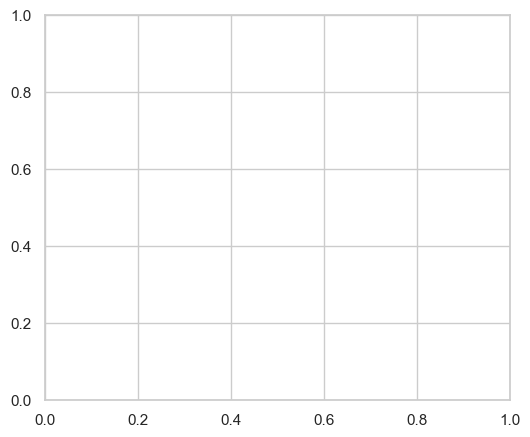

In [33]:
# create a figure
fig, ax = plt.subplots(figsize=(6, 5))


ax.plot(epsilon_relationship_set, two_way_ave_error, color='darkred', label = r'$\mathsf{MST}$', marker = '*', markersize=8)


ax.set_xlabel('Privacy budget: $\epsilon$', fontsize=20)
ax.set_ylabel('Average Error (%)', fontsize=20)
# ax.grid()
ax.legend(loc='upper right', fontsize=14, fancybox=True, edgecolor='black')




ax.set_xlim(0, 18)
# ax.set_ylim(-0.001, 1.0)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.set_title('Movie Lens', size = 20, fontweight="bold")

